In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv(r'C:\Users\RAGHU\Desktop\feeds.csv')

In [4]:
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6
0,2022-11-08T16:28:59+00:00,1,23,82,397,879,206,235
1,2022-11-08T16:29:35+00:00,2,23,82,393,875,237,235
2,2022-11-08T16:30:11+00:00,3,23,82,377,874,224,235
3,2022-11-08T16:30:48+00:00,4,23,82,370,535,82,235
4,2022-11-08T16:31:24+00:00,5,23,83,358,451,215,235
...,...,...,...,...,...,...,...,...
448,2023-04-15T16:40:19+00:00,449,24,59,328,882,256,235
449,2023-04-15T16:41:36+00:00,450,24,59,318,878,320,235
450,2023-04-15T16:42:08+00:00,451,24,59,320,885,313,235
451,2023-04-15T16:42:45+00:00,452,24,59,317,881,345,235


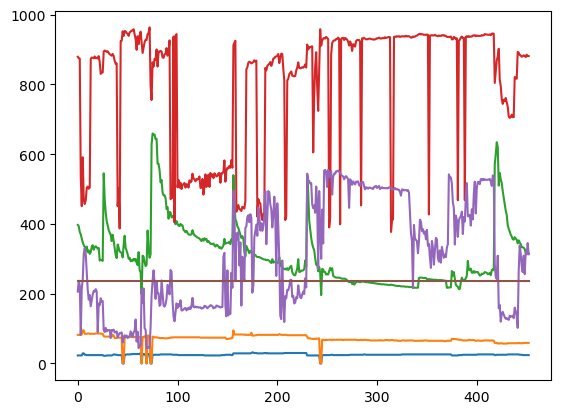

In [5]:
plt.plot(df["field1"])
plt.plot(df["field2"])
plt.plot(df["field3"])
plt.plot(df["field4"])
plt.plot(df["field5"])
plt.plot(df["field6"])

In [6]:
#to make time as stationary
#Augmented Dickey–Fuller test
X = df["field5"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.981414
p-value: 0.294781
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


# Auto Regressive model
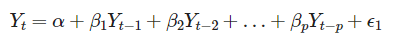

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


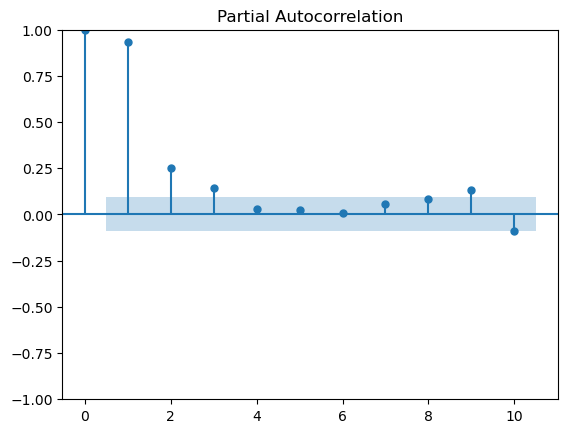

In [7]:
#partial Autocorrelation
plot_pacf(X, lags=10);

In [8]:
#yt is field4 and yt-1 is shifted values
df["Values_shifted"]  = df["field5"].shift()

In [9]:
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,Values_shifted
0,2022-11-08T16:28:59+00:00,1,23,82,397,879,206,235,NaN
1,2022-11-08T16:29:35+00:00,2,23,82,393,875,237,235,206.0
2,2022-11-08T16:30:11+00:00,3,23,82,377,874,224,235,237.0
3,2022-11-08T16:30:48+00:00,4,23,82,370,535,82,235,224.0
4,2022-11-08T16:31:24+00:00,5,23,83,358,451,215,235,82.0
...,...,...,...,...,...,...,...,...,...
448,2023-04-15T16:40:19+00:00,449,24,59,328,882,256,235,309.0
449,2023-04-15T16:41:36+00:00,450,24,59,318,878,320,235,256.0
450,2023-04-15T16:42:08+00:00,451,24,59,320,885,313,235,320.0
451,2023-04-15T16:42:45+00:00,452,24,59,317,881,345,235,313.0


In [10]:
df.drop('created_at', axis = 1, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df

,entry_id,field1,field2,field3,field4,field5,field6,Values_shifted
1,2,23,82,393,875,237,235,206.0
2,3,23,82,377,874,224,235,237.0
3,4,23,82,370,535,82,235,224.0
4,5,23,83,358,451,215,235,82.0
5,6,29,95,347,591,241,235,215.0
...,...,...,...,...,...,...,...,...
448,449,24,59,328,882,256,235,309.0
449,450,24,59,318,878,320,235,256.0
450,451,24,59,320,885,313,235,320.0
451,452,24,59,317,881,345,235,313.0


In [13]:
y = df.field5.values
X = df.Values_shifted.values

In [14]:
#train 80% of data
train_size = int(len(X) * 0.80)

In [15]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [16]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([0.93327385])

In [19]:
lr.intercept_

20.437369824056304

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([303.21934659, 292.95333423, 322.81809745, 290.15351268,
       332.15083596, 317.21845435, 303.21934659, 311.61881124,
       305.08589429, 330.28428826, 339.61702677, 526.27179691,
       517.87233225, 517.87233225, 502.00667679, 451.60988885,
       435.74423339, 338.68375291, 416.14548252, 403.07964861,
       359.21577763, 403.07964861, 410.54583942, 413.34566097,
       426.41149488, 366.68196844, 412.41238712, 400.27982706,
       466.54227046, 502.93995064, 414.27893482, 414.27893482,
       418.01203022, 389.08054085, 432.94441184, 405.87947017,
       474.94173512, 506.67304604, 421.74512563, 489.87411673,
       505.73977219, 505.73977219, 500.14012909, 513.205963  ,
       514.13923685, 510.40614144, 514.13923685, 511.33941529,
       512.27268915, 511.33941529, 512.27268915, 512.27268915,
       514.13923685, 507.60631989, 495.47375983, 523.47197535,
       518.8056061 , 286.42041727, 251.8892848 , 246.28964169,
       308.81898969, 167.89463824, 177.22737674, 132.43

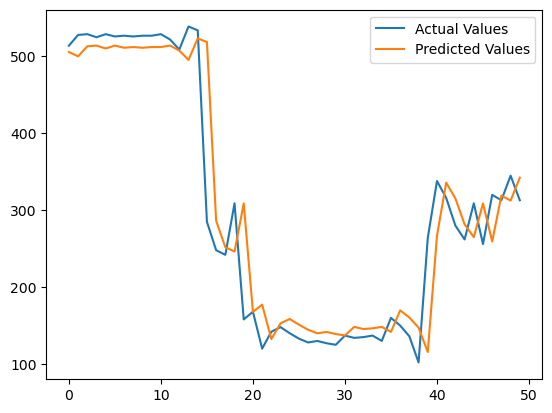

In [21]:
plt.plot(y_test[-50:], label="Actual Values")
plt.plot(y_pred[-50:], label="Predicted Values")
plt.legend()
plt.show()